## Neurona McCulloch - Pitts
## Diagnóstico de cáncer de mama

**Nombre:** David L. Mejía<br>
**Fecha:** 29/09/2025<br>
**Git:** https://github.com/mcdavidleonardo/MachineLearning2/blob/master/NeuronaMP_CancerMama.ipynb<br>

In [1]:
# Se lee el conjunto de datos que ya viene incluido en la librería sklearn

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [2]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [4]:
# Se visualiza el conjunto de datos con pandas

import pandas as pd
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
from sklearn.model_selection import train_test_split

# Se divide el conjunto de datos en train - test
X_train, X_test, y_train, y_test = train_test_split(df, Y, stratify=Y)

print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))


Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


In [7]:
# Implementación de la neurona MP añadiendo método para calcular el threshold
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:

    def __init__(self):
        self.threshlod = None

    def model(self, x):
        return (sum(x) >= self.threshold)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)

        # Seleccionamos el threshold que mejores resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


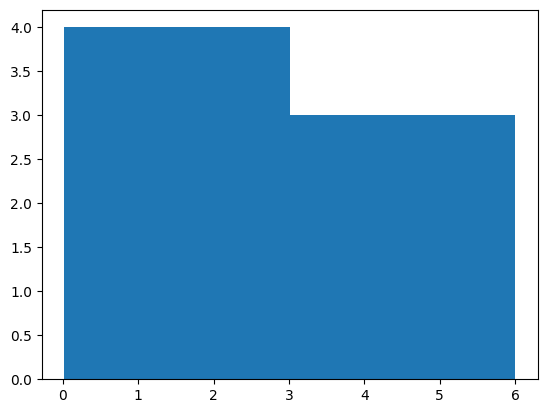

In [8]:
# Se debe transformar a valores binarios los valores del conjunto de datos
# Para transformar un valor a binario
import matplotlib.pyplot as plt

print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0, 1]))

plt.hist([0.04, 0.3, 4, 5, 6, 0.02, 0.6], bins=2)
plt.show()


In [9]:
# Transformamos las características de entrada a un valor binario

X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])
X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
244,0,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
493,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
30,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,1,0,1,1
228,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45,0,1,0,1,0,1,1,0,1,1,...,0,1,1,1,0,1,0,0,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [10]:
# Instanciamos el modelo MPNeuron
mp_neuron = MPNeuron()

# Encontramos el threshold óptimo
mp_neuron.fit(X_train_bin.to_numpy(), y_train)

In [11]:
# Threshold óptimo seleccionado
mp_neuron.threshold

28

In [12]:
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento

Y_pred = mp_neuron.predict(X_test_bin.to_numpy())

In [13]:
Y_pred

array([False,  True, False,  True,  True,  True, False, False,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,

In [14]:
# Calculamos la exactitud de nuestra predicción

accuracy_score(y_test, Y_pred)

0.8531468531468531

In [15]:
# Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, Y_pred)

array([[50,  3],
       [18, 72]])

array([[50,  3],
       [18, 72]])
 
 50  --> Verdaderos positivos
  3  --> Falsos positivos
 18  --> Falsos negativos
 72  --> Verdaderos negativos

### Ejemplo de predicción datos nuevos ingresados por teclado

In [16]:
# Función para ingreso de datos
# Se ejecuta un bucle para las 30 columnas y se vaya registrando los datos
def ingreso_datos(column_names):
    # Diccionario para datos del paciente
    user_data = {}
    print("\nIngreso de Nuevos Datos")
    for name in column_names:
        while True:
            try:
                # Los datos son flotantes
                value = float(input(f"Ingrese el valor para '{name}': "))
                user_data[name] = value
                break
            except ValueError:
                print("Error. Ingrese un número.")
    return user_data

In [17]:
# Función para convertir los datos a 0 o 1
def convertir_binario(user_data, X_train_original):
    # Se convierte los datos del usuario a un dataframe
    user_df = pd.DataFrame([user_data])

    X_train_original = X_train

    # Se convierte a 0 o 1
    # Definición: Se calcula el punto medio (la media) de cada característica(columna) en el conjunto de entrenamiento original (X_train).
    # Ejemplo:
    # En el conjunto de entrenamiento (X_train), suponemos que los valores de "radio promedio" varían entre 6.0 y 20.0.
    # Valor Mínimo: 6.0
    # Valor Máximo: 20.0
    # Media (Punto de Corte): 13.0
    # > 13 --> 1; <= 13 --> 0
    user_0_1 = user_df.copy()
    for col in X_train_original.columns:
        min_val = X_train_original[col].min()
        max_val = X_train_original[col].max()
        cut_point = X_train_original[col].mean()
        user_0_1[col] = np.where(user_df[col] > cut_point, 1, 0)
    
    return user_0_1.to_numpy()

In [20]:
# Función para ejecutar la predicción
def predict_cancer(mp_neuron_model, input_0_1):
    # Predicción
    Y_pred_new = mp_neuron_model.predict(input_0_1)
    
    prediction_label = "no tiene cancer" if Y_pred_new[0] == 0 else "tiene cancer"
    
    print(f"El paciente {prediction_label}")
    print(f"Valor de la predicción: {Y_pred_new[0]}")
    print(f"Threshold óptimo usado: {mp_neuron_model.threshold}")

In [21]:
# Predecir

# Se obtiene las etiquetas del set de datos
column_names = X_train.columns.tolist()
# Se solicita ingreso de datos
user_data = ingreso_datos(column_names)

# Se transforma a 0/1
data_0_1 = convertir_binario(user_data, X_train)

print("\nDatos de Entrada (0 o 1):")
print(pd.DataFrame(data_0_1, columns=column_names))

# Ejecutar predicción
predict_cancer(mp_neuron, data_0_1)


Ingreso de Nuevos Datos


Ingrese el valor para 'mean radius':  11
Ingrese el valor para 'mean texture':  15
Ingrese el valor para 'mean perimeter':  70
Ingrese el valor para 'mean area':  400
Ingrese el valor para 'mean smoothness':  0.08
Ingrese el valor para 'mean compactness':  0.05
Ingrese el valor para 'mean concavity':  0.01
Ingrese el valor para 'mean concave points':  0.005
Ingrese el valor para 'mean symmetry':  0.16
Ingrese el valor para 'mean fractal dimension':  0.06
Ingrese el valor para 'radius error':  0.25
Ingrese el valor para 'texture error':  0.25
Ingrese el valor para 'perimeter error':  0.25
Ingrese el valor para 'area error':  0.25
Ingrese el valor para 'smoothness error':  0.25
Ingrese el valor para 'compactness error':  0.25
Ingrese el valor para 'concavity error':  0.25
Ingrese el valor para 'concave points error':  0.25
Ingrese el valor para 'symmetry error':  0.25
Ingrese el valor para 'fractal dimension error':  0.25
Ingrese el valor para 'worst radius':  12.5
Ingrese el valor para 


Datos de Entrada (0 o 1):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0            0             0               0          0                0   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0                 0               0                    0              0   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                       0  ...             0              0                0   

   worst area  worst smoothness  worst compactness  worst concavity  \
0           0                 1                  1                1   

   worst concave points  worst symmetry  worst fractal dimension  
0                     1               1                        1  

[1 rows x 30 columns]
El paciente no tiene cancer
Valor de la predicción: False
Threshold óptimo usado: 28
